<a href="https://colab.research.google.com/github/rohinish404/learning_pytorch/blob/master/cifar_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

In [2]:
print(torch.__version__)
print(torchvision.__version__)
     

2.0.0+cu118
0.15.1+cu118


In [3]:
first_transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [4]:

from torchvision import datasets
train_data = datasets.CIFAR10(
    root = "data",
    train=True,
    download=True,
    transform=first_transform,
    target_transform=None
)
test_data = datasets.CIFAR10(
    root = "data",
    train=False,
    download=True,
    transform=first_transform,
    target_transform=None
)
 

100%|██████████| 170498071/170498071 [00:04<00:00, 38304927.37it/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


In [5]:
len(train_data),len(test_data)

(50000, 10000)

In [6]:
classes = train_data.classes
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [7]:
image1, label1 = train_data[0]
image1, label1
     

(tensor([[[-0.5373, -0.6627, -0.6078,  ...,  0.2392,  0.1922,  0.1608],
          [-0.8745, -1.0000, -0.8588,  ..., -0.0353, -0.0667, -0.0431],
          [-0.8039, -0.8745, -0.6157,  ..., -0.0745, -0.0588, -0.1451],
          ...,
          [ 0.6314,  0.5765,  0.5529,  ...,  0.2549, -0.5608, -0.5843],
          [ 0.4118,  0.3569,  0.4588,  ...,  0.4431, -0.2392, -0.3490],
          [ 0.3882,  0.3176,  0.4039,  ...,  0.6941,  0.1843, -0.0353]],
 
         [[-0.5137, -0.6392, -0.6235,  ...,  0.0353, -0.0196, -0.0275],
          [-0.8431, -1.0000, -0.9373,  ..., -0.3098, -0.3490, -0.3176],
          [-0.8118, -0.9451, -0.7882,  ..., -0.3412, -0.3412, -0.4275],
          ...,
          [ 0.3333,  0.2000,  0.2627,  ...,  0.0431, -0.7569, -0.7333],
          [ 0.0902, -0.0353,  0.1294,  ...,  0.1608, -0.5137, -0.5843],
          [ 0.1294,  0.0118,  0.1137,  ...,  0.4431, -0.0745, -0.2784]],
 
         [[-0.5059, -0.6471, -0.6627,  ..., -0.1529, -0.2000, -0.1922],
          [-0.8431, -1.0000,

(-0.5, 31.5, 31.5, -0.5)

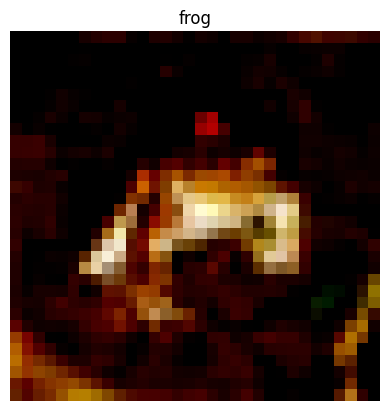

In [8]:
plt.imshow(image1.squeeze(dim=0).permute(1,2,0))
plt.title(classes[label1])
plt.axis(False)

In [9]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset = train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset = test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False)

In [10]:
len(train_dataloader)

1563

In [11]:
train_features_batch,train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape

torch.Size([32, 3, 32, 32])

In [12]:
flatten_model = nn.Flatten()
x = train_features_batch[0]
output = flatten_model(x)
output.shape

torch.Size([3, 1024])

In [13]:
import torch
from torch import nn

class CIFARModelV1(nn.Module):
  def __init__(self,input_shape:int,
               output_shape:int,
               hidden_units:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1
                  ),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1
                  ),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1
                  ),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1
                  ),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*8*8,
                  out_features = output_shape)
    )
  def forward(self,x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    # print(x.shape)
    return x

In [14]:
torch.manual_seed(42)
model_1 = CIFARModelV1(input_shape=3,
                              hidden_units=10,
                              output_shape=len(classes)
                              )
     

In [15]:
model_1

CIFARModelV1(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=640, out_features=10, bias=True)
  )
)

In [16]:
img,label = train_features_batch[0],train_labels_batch[0]
img.shape

torch.Size([3, 32, 32])

In [17]:
rand_image_tensor = torch.randn(size=(3,32,32))
model_1(rand_image_tensor.unsqueeze(0))

tensor([[-0.0632, -0.0633, -0.0042, -0.0175,  0.0455, -0.0195, -0.0302, -0.0788,
          0.0230, -0.0267]], grad_fn=<AddmmBackward0>)

In [18]:
model_1

CIFARModelV1(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=640, out_features=10, bias=True)
  )
)

In [19]:

import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [20]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss() 
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [21]:
from timeit import default_timer as timer 
def print_train_time(start: float, end: float, device: torch.device = None):
  
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [22]:
from tqdm.auto import tqdm
torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs=3

for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}\n------")
  train_loss = 0

  for batch,(X,y) in enumerate(train_dataloader):
    model_1.train()
    y_pred = model_1(X)
    loss = loss_fn(y_pred,y)
    train_loss+=loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 400 == 0:
        print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")


  train_loss /= len(train_dataloader)
  test_loss,test_acc = 0,0 
  model_1.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      test_pred = model_1(X_test)
      test_loss += loss_fn(test_pred,y_test)
      test_acc += accuracy_fn(y_true = y_test,y_pred = test_pred.argmax(dim=1))
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)  

  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")
train_time_end_on_cpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_cpu, 
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_1.parameters()).device))  




  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
------
Looked at 0/50000 samples
Looked at 12800/50000 samples
Looked at 25600/50000 samples
Looked at 38400/50000 samples

Train loss: 2.16511 | Test loss: 1.98359, Test acc: 28.75%

Epoch:1
------
Looked at 0/50000 samples
Looked at 12800/50000 samples
Looked at 25600/50000 samples
Looked at 38400/50000 samples

Train loss: 1.74134 | Test loss: 1.61876, Test acc: 42.12%

Epoch:2
------
Looked at 0/50000 samples
Looked at 12800/50000 samples
Looked at 25600/50000 samples
Looked at 38400/50000 samples

Train loss: 1.52328 | Test loss: 1.44145, Test acc: 47.82%

Train time on cpu: 219.533 seconds


In [23]:
from tqdm.auto import tqdm
torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs=5

for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}\n------")
  train_loss = 0

  for batch,(X,y) in enumerate(train_dataloader):
    model_1.train()
    y_pred = model_1(X)
    loss = loss_fn(y_pred,y)
    train_loss+=loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 400 == 0:
        print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")


  train_loss /= len(train_dataloader)
  test_loss,test_acc = 0,0 
  model_1.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      test_pred = model_1(X_test)
      test_loss += loss_fn(test_pred,y_test)
      test_acc += accuracy_fn(y_true = y_test,y_pred = test_pred.argmax(dim=1))
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)  

  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")
train_time_end_on_cpu = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_on_cpu, 
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_1.parameters()).device))  



  0%|          | 0/5 [00:00<?, ?it/s]

Epoch:0
------
Looked at 0/50000 samples
Looked at 12800/50000 samples
Looked at 25600/50000 samples
Looked at 38400/50000 samples

Train loss: 1.41387 | Test loss: 1.37264, Test acc: 51.05%

Epoch:1
------
Looked at 0/50000 samples
Looked at 12800/50000 samples
Looked at 25600/50000 samples
Looked at 38400/50000 samples

Train loss: 1.34196 | Test loss: 1.36893, Test acc: 50.67%

Epoch:2
------
Looked at 0/50000 samples
Looked at 12800/50000 samples
Looked at 25600/50000 samples
Looked at 38400/50000 samples

Train loss: 1.27760 | Test loss: 1.23674, Test acc: 56.33%

Epoch:3
------
Looked at 0/50000 samples
Looked at 12800/50000 samples
Looked at 25600/50000 samples
Looked at 38400/50000 samples

Train loss: 1.21792 | Test loss: 1.28754, Test acc: 54.79%

Epoch:4
------
Looked at 0/50000 samples
Looked at 12800/50000 samples
Looked at 25600/50000 samples
Looked at 38400/50000 samples

Train loss: 1.16693 | Test loss: 1.15086, Test acc: 59.02%

Train time on cpu: 362.850 seconds


In [24]:
train_loss

tensor(1.1669, grad_fn=<DivBackward0>)

In [25]:
test_loss

tensor(1.1509)

In [26]:
def make_predictions(model: nn.Module, data:list):
  pred_probs=[]
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample,dim=0)
      pred_logit = model(sample)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
      pred_probs.append(pred_prob.cpu())
            
    return torch.stack(pred_probs)

In [27]:
import random
random.seed(42)
test_samples=[]
test_labels=[]
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)


print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({classes[test_labels[0]]})")
     


Test sample image shape: torch.Size([3, 32, 32])
Test sample label: 9 (truck)


In [28]:
pred_probs= make_predictions(model=model_1, 
                             data=test_samples)

pred_probs[:2]
     

tensor([[4.7967e-02, 6.8833e-02, 1.1068e-03, 2.9568e-03, 1.7067e-03, 3.5251e-04,
         7.8719e-04, 1.5213e-03, 4.4233e-03, 8.7035e-01],
        [1.0904e-03, 1.4067e-05, 4.7674e-01, 2.5665e-01, 4.3742e-02, 2.0574e-01,
         3.1285e-03, 1.1117e-02, 1.2955e-03, 4.7867e-04]])

In [29]:

pred_classes = pred_probs.argmax(dim=1)
pred_classes
     

tensor([9, 2, 1, 6, 6, 5, 7, 0, 1])

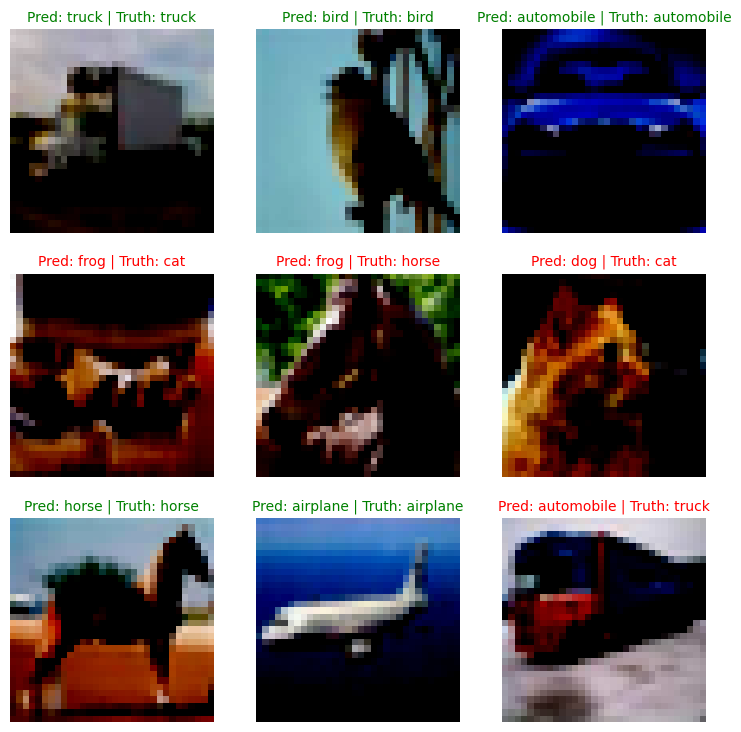

In [30]:
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3

for i, sample in enumerate(test_samples):

  plt.subplot(nrows, ncols, i+1)


  plt.imshow(sample.squeeze(dim=0).permute(1,2,0))


  pred_label = classes[pred_classes[i]]


  truth_label = classes[test_labels[i]] 


  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  

  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") 
  else:
      plt.title(title_text, fontsize=10, c="r") 
  plt.axis(False);

     

In [31]:
sample.shape

torch.Size([3, 32, 32])

In [32]:
try:
    from going_modular.going_modular import data_setup, engine
except:
    # Get the going_modular scripts
    print("[INFO] Couldn't find going_modular scripts... downloading them from GitHub.")
    !git clone https://github.com/mrdbourke/pytorch-deep-learning
    !mv pytorch-deep-learning/going_modular .
    !rm -rf pytorch-deep-learning
    from going_modular.going_modular import data_setup, engine

[INFO] Couldn't find going_modular scripts... downloading them from GitHub.
Cloning into 'pytorch-deep-learning'...
remote: Enumerating objects: 3685, done.
remote: Counting objects: 100% (307/307), done.
remote: Compressing objects: 100% (155/155), done.
remote: Total 3685 (delta 158), reused 288 (delta 147), pack-reused 3378
Receiving objects: 100% (3685/3685), 648.08 MiB | 32.58 MiB/s, done.
Resolving deltas: 100% (2114/2114), done.
Updating files: 100% (247/247), done.


In [33]:
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

[INFO] Couldn't find torchinfo... installing it.


In [34]:
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT
auto_transforms = weights.transforms()
auto_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

In [35]:
from torchvision import datasets
train_data = datasets.CIFAR10(
    root = "data",
    train=True,
    download=True,
    transform=auto_transforms,
    target_transform=None
)
test_data = datasets.CIFAR10(
    root = "data",
    train=False,
    download=True,
    transform=auto_transforms,
    target_transform=None
)

Files already downloaded and verified
Files already downloaded and verified


In [36]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset = train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset = test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False)

In [37]:
image2, label2 = train_data[0]
image2.shape, label2

(torch.Size([3, 224, 224]), 6)

In [38]:
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT  
model = torchvision.models.efficientnet_b0(weights=weights)

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-3dd342df.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-3dd342df.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 71.4MB/s]


In [39]:
summary(model=model, 
        input_size=(32, 3, 224, 224), 
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
) 

/usr/local/lib/python3.9/dist-packages/torchinfo/torchinfo.py:477: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  action_fn=lambda data: sys.getsizeof(data.storage()),
/usr/local/lib/python3.9/dist-packages/torch/storage.py:665: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return super().__sizeof__() + self.nbytes()


Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 1000]           --                   True
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   True
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   True
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   864                  True
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   64                   True
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 16, 112

In [40]:
for param in model.features.parameters():
    param.requires_grad = False

In [41]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

output_shape = len(classes)

model.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True), 
    torch.nn.Linear(in_features=1280, 
                    out_features=output_shape,
                    bias=True))


In [42]:
summary(model=model, 
        input_size=(32, 3, 224, 224), 
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
) 

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 10]             --                   Partial
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   False
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   False
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   (864)                False
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   (64)                 False
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 

In [43]:
loss_fn_1 = nn.CrossEntropyLoss()
optimizer_1 = torch.optim.Adam(model.parameters(), lr=0.001)

In [44]:
torch.manual_seed(42)



from timeit import default_timer as timer 
start_time = timer()


results = engine.train(model=model,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer_1,
                       loss_fn=loss_fn_1,
                       epochs=3,device="cpu")


end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.8760 | train_acc: 0.7180 | test_loss: 0.6024 | test_acc: 0.7988
Epoch: 2 | train_loss: 0.7125 | train_acc: 0.7602 | test_loss: 0.5824 | test_acc: 0.7981
Epoch: 3 | train_loss: 0.6938 | train_acc: 0.7632 | test_loss: 0.5692 | test_acc: 0.8030
[INFO] Total training time: 15669.660 seconds
